In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
%matplotlib inline

In [6]:
dataset = pd.read_csv('Loan_train.csv')

In [8]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
#Now finding the Shape of data means numbers of Rows and Columns (rows,col)
dataset.shape

(614, 13)

In [11]:
#check the missing values and datatypes
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


In [13]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [20]:
pd.crosstab(dataset['Credit_History'],dataset['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [21]:
#We can cearly see that a person with credit history False have more chances of rejection as compared to credit history True

<AxesSubplot: >

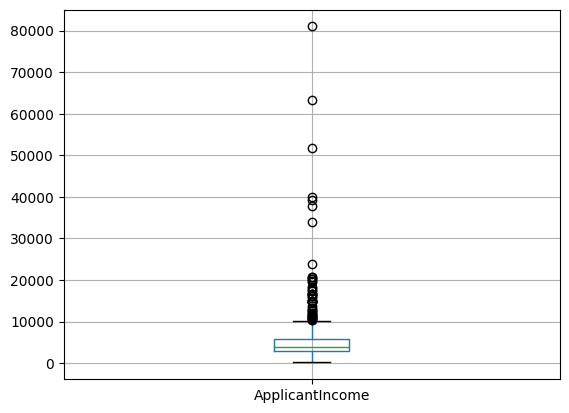

In [37]:
dataset.boxplot(column='ApplicantIncome')

In [38]:
#As we can see that there are too manu outliers so we are gonna remove these outliers 

<AxesSubplot: >

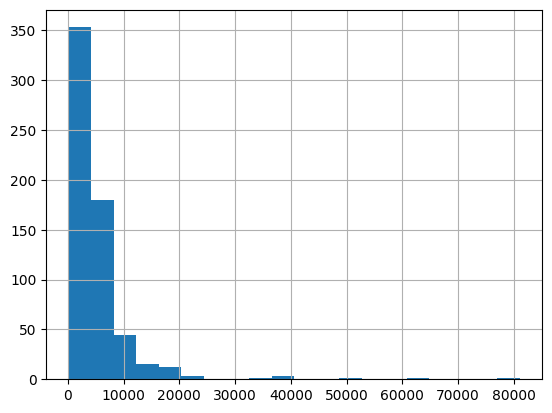

In [42]:

dataset['ApplicantIncome'].hist(bins=20)
#X axis representing the Income of the Applicant and Y axis is representing its Frequency

<AxesSubplot: >

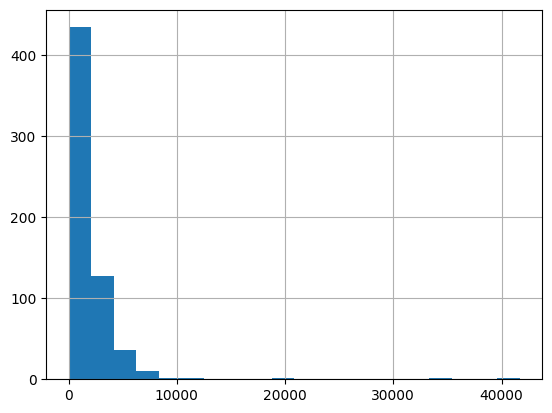

In [43]:
dataset['CoapplicantIncome'].hist(bins=20)
#X axis representing the Income of the Applicant and Y axis is representing its Frequency

<AxesSubplot: title={'center': 'ApplicantIncome'}, xlabel='Education'>

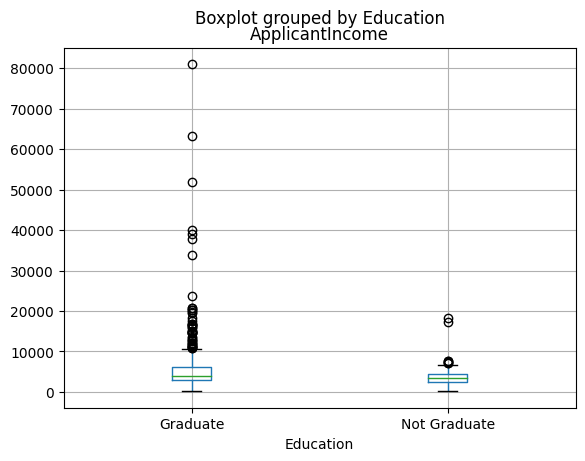

In [46]:
#comparing Loan status on the basis of appicant income vs Education
dataset.boxplot(column='ApplicantIncome' , by='Education')

<AxesSubplot: title={'center': 'ApplicantIncome'}, xlabel='Self_Employed'>

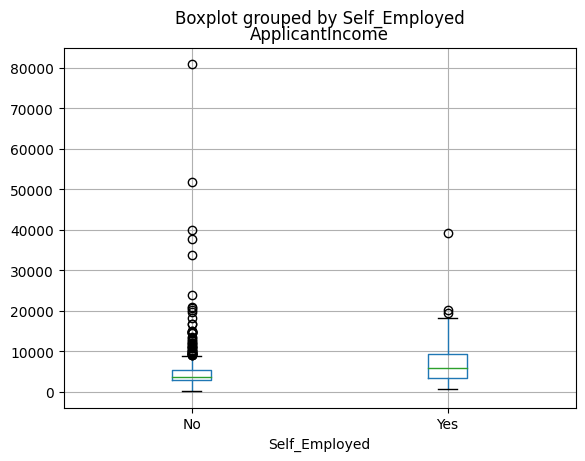

In [47]:
#comparing Loan status on the basis of appicant income vs Self eMployed
dataset.boxplot(column='ApplicantIncome' , by='Self_Employed')

<AxesSubplot: >

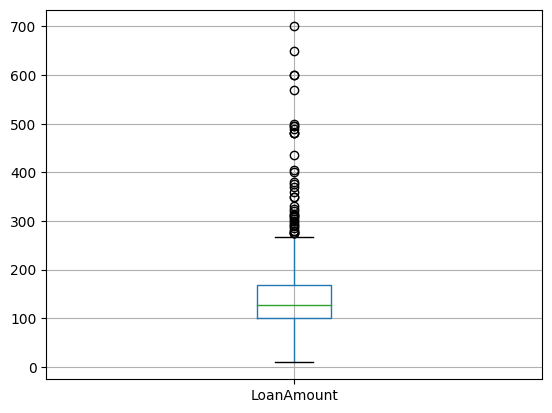

In [50]:
#Here we have Same situation as we have outliers
dataset.boxplot(column='LoanAmount')

In [51]:
#Taking the Histogram of LoanAmount Variable

<AxesSubplot: >

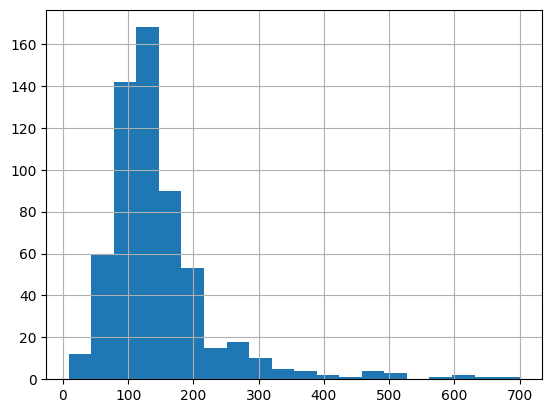

In [52]:
dataset['LoanAmount'].hist(bins=20)

In [53]:
#Data is little right Skewed

In [54]:
#Normalizing the data

In [55]:
dataset['LoanAmount_log'] = np.log(dataset['LoanAmount'])

<AxesSubplot: >

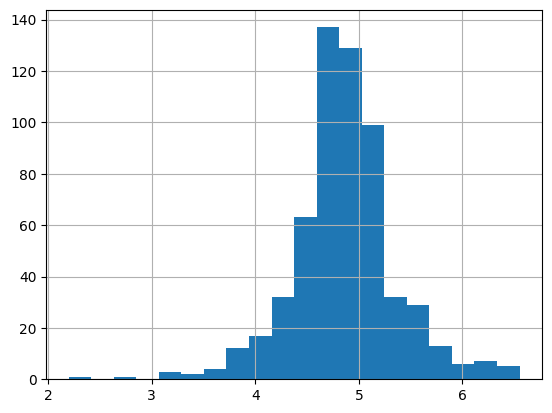

In [56]:
dataset['LoanAmount_log'].hist(bins=20)

In [57]:
#Now data is pretty normal

In [61]:
dataset.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,False,False,False,False,False,False,False,False,True,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [62]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [72]:
#Now we are going to fill the null values by mean or median or mode
#Firstly Filling the Gender by taking the mode as Gender belongs to Qualitative data
dataset['Gender'].fillna(dataset['Gender'].mode(),inplace=True)

In [73]:
dataset['Gender']

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [74]:
dataset['Gender'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Name: Gender, Length: 614, dtype: bool

In [71]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [75]:
dataset['Gender'].fillna(dataset['Gender'].mode(),inplace=True)

In [77]:
dataset['Married'].fillna(dataset['Gender'].mode(),inplace=True)

<AxesSubplot: >

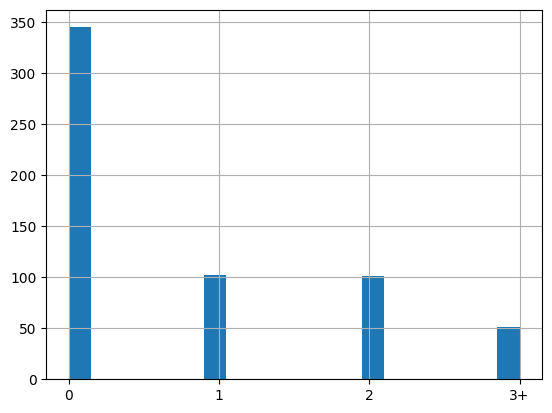

In [78]:
dataset['Dependents'].hist(bins=20)

In [82]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log
count,614.000000,614.000000,592.000000,600.00000,564.000000,592.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,4.857444
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.505142
min,150.000000,0.000000,9.000000,12.00000,0.000000,2.197225
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,4.605170
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,4.852030
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,5.123964
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,6.551080


In [87]:
dataset['Dependents'].fillna(dataset['Dependents'].mode(), inplace=True)


In [89]:
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode(), inplace=True)

<AxesSubplot: >

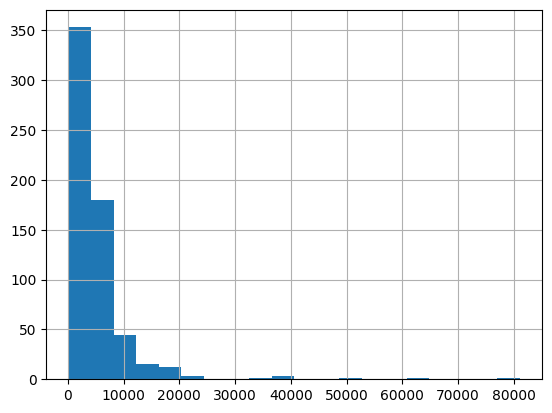

In [90]:
dataset['Loan'].hist(bins=20)

In [ ]:
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50

In [91]:
dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean(), inplace=True)

In [92]:
dataset['LoanAmount_log'].fillna(dataset['LoanAmount_log'].mean(), inplace=True)

In [ ]:
datas